# Online Customers Clustring Project 

### By : Omar Mahmoud Abdel Rahman
### Date : 8/2/2023

In [1]:
#importing needed liberaries
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn.preprocessing import StandardScaler, PowerTransformer
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.metrics import silhouette_score


In [2]:
#reading the data 
df = pd.read_csv('Cleaned_Data_Merchant_Level.csv')

In [3]:
df.head()

,Trx_Rank,Points,Trx_Vlu,Trx_Age,Customer_Age,Category In English,User_Id,Mer_Id
0,1,20140,2014.0,362,362,Fashion,21053,0
1,1,11200,1120.0,371,368,Fashion,26472,0
2,2,8500,850.0,368,368,Fashion,26472,0
3,1,1980,198.0,558,34,Fashion,27075,0
4,1,2400,240.0,413,413,Fashion,27417,0


# EDA on The Data

In [4]:
df.describe()

,Trx_Rank,Points,Trx_Vlu,Trx_Age,Customer_Age,User_Id,Mer_Id
count,43672.000000,43672.000000,43672.000000,43672.000000,43672.000000,43672.000000,43672.000000
mean,1.265227,3312.249748,331.224975,185.186664,144.027844,17173.411889,16.277111
std,0.776549,5756.374137,575.637414,121.989540,114.764448,9665.399084,16.099288
min,1.000000,20.000000,2.000000,1.000000,1.000000,0.000000,0.000000
25%,1.000000,1220.000000,122.000000,62.000000,34.000000,8710.750000,8.000000
50%,1.000000,1893.500000,189.350000,203.000000,115.000000,17561.000000,8.000000
75%,1.000000,3100.000000,310.000000,271.000000,252.000000,25634.250000,26.000000
max,17.000000,263800.000000,26380.000000,698.000000,682.000000,33518.000000,56.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43672 entries, 0 to 43671
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Trx_Rank             43672 non-null  int64  
 1   Points               43672 non-null  int64  
 2   Trx_Vlu              43672 non-null  float64
 3   Trx_Age              43672 non-null  int64  
 4   Customer_Age         43672 non-null  int64  
 5   Category In English  43672 non-null  object 
 6   User_Id              43672 non-null  int64  
 7   Mer_Id               43672 non-null  int64  
dtypes: float64(1), int64(6), object(1)
memory usage: 2.7+ MB


<Axes: xlabel='Mer_Id', ylabel='count'>

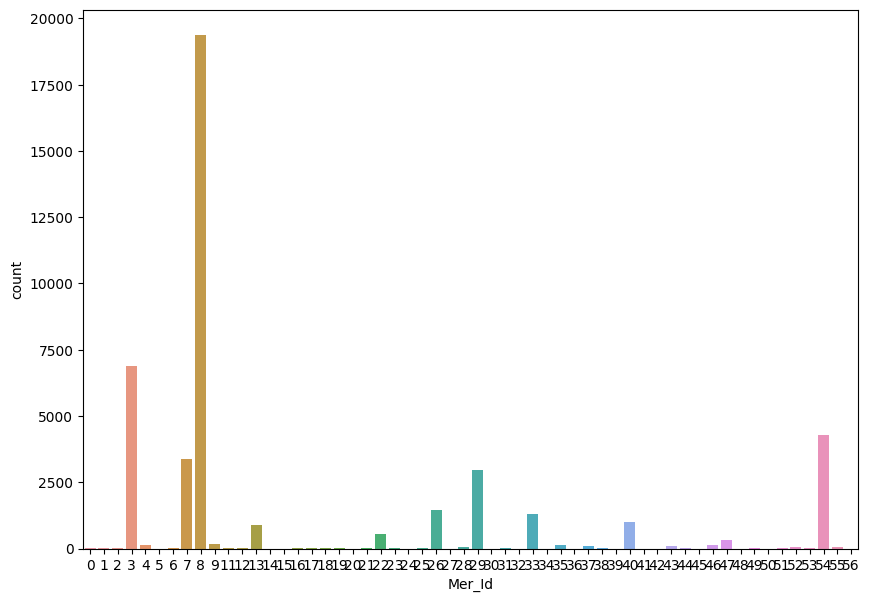

In [6]:
plt.figure(figsize = (10, 7))
sns.countplot(data = df, x ='Mer_Id')

# Data Preprocessing 

In [7]:
df.groupby('User_Id')['Customer_Age'].min().reset_index()['Customer_Age']

0        281
1         34
2        236
3        320
4        407
        ... 
33452    101
33453    244
33454    256
33455     13
33456     55
Name: Customer_Age, Length: 33457, dtype: int64

In [8]:
Users_df = pd.DataFrame(df.groupby('User_Id')['Customer_Age'].sum().reset_index()['User_Id'])

# Feature Engineering

In [9]:
Users_df['Total_Points'] = df.groupby('User_Id')['Points'].sum().reset_index()['Points']

In [10]:
Users_df["Last_Seen"] = df.groupby('User_Id')['Customer_Age'].min().reset_index()['Customer_Age']

In [11]:
columns_to_drop = [452,3474,4355,4947,7998,8147,10809,11030,12642,18156,19376,22355]
Users_df = Users_df.drop(columns_to_drop)

In [12]:
Users_df.head()

,User_Id,Total_Points,Last_Seen
0,0,4427,281
1,1,2490,34
2,2,3000,236
3,3,1620,320
4,4,700,407


In [13]:
df['Fashion']=df['Category In English'].apply( lambda x : 1 if x =='Fashion' else 0)
df['Grocery']=df['Category In English'].apply( lambda x : 1 if x =='Grocery' else 0)
df['F&B']=df['Category In English'].apply( lambda x : 1 if x =='F&B' else 0)
df['Other']=df['Category In English'].apply( lambda x : 1 if (x =='Other')| (x =='Electronics') | (x =='Transportaion' )else 0)
df['Health & Beauty']=df['Category In English'].apply( lambda x : 1 if x =='Health & Beauty' else 0)

<Axes: xlabel='User_Id', ylabel='Total_Points'>

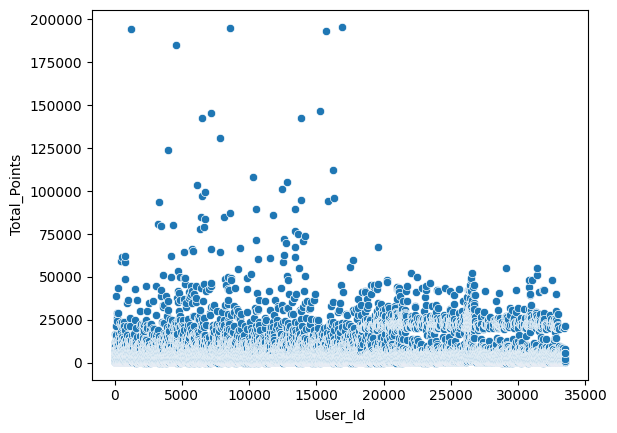

In [14]:
sns.scatterplot(data = Users_df, x = 'User_Id',y = 'Total_Points')

In [15]:
Users_df[Users_df['Total_Points'] > 0.2e6]

,User_Id,Total_Points,Last_Seen


<Axes: xlabel='User_Id', ylabel='Last_Seen'>

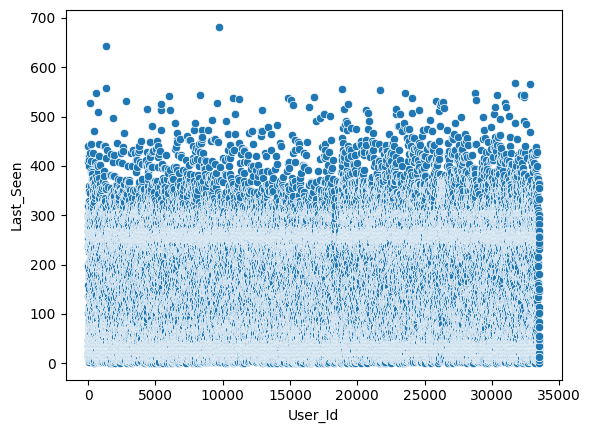

In [16]:
sns.scatterplot(data = Users_df, x = 'User_Id',y = 'Last_Seen')

In [17]:
Fashion = df.groupby("User_Id")['Fashion'].sum().reset_index()
Grocery = df.groupby("User_Id")['Grocery'].sum().reset_index()
F_B = df.groupby("User_Id")['F&B'].sum().reset_index()
Other = df.groupby("User_Id")['Other'].sum().reset_index()
Health_Beauty = df.groupby("User_Id")['Health & Beauty'].sum().reset_index()

In [18]:
df.head()

,Trx_Rank,Points,Trx_Vlu,Trx_Age,Customer_Age,Category In English,User_Id,Mer_Id,Fashion,Grocery,F&B,Other,Health & Beauty
0,1,20140,2014.0,362,362,Fashion,21053,0,1,0,0,0,0
1,1,11200,1120.0,371,368,Fashion,26472,0,1,0,0,0,0
2,2,8500,850.0,368,368,Fashion,26472,0,1,0,0,0,0
3,1,1980,198.0,558,34,Fashion,27075,0,1,0,0,0,0
4,1,2400,240.0,413,413,Fashion,27417,0,1,0,0,0,0


In [19]:
Fashion_group = df.groupby("User_Id")[['Fashion','Grocery','F&B','Other','Health & Beauty']].sum().reset_index()

In [20]:
# Checking That Our PreProcessing Is Correct
Fashion_group[Fashion_group['User_Id'] == 19390]

,User_Id,Fashion,Grocery,F&B,Other,Health & Beauty
19376,19390,2,10,0,17,0


In [21]:
Users_df[['Fashion','Grocery','F&B','Other','Health & Beauty']] = Fashion_group[['Fashion','Grocery','F&B','Other','Health & Beauty']]

### Dropping the Other columne and see how the Model react 

In [22]:
Users_df = Users_df.drop(columns ="Other",index=1)

In [23]:
Users_df.head()

,User_Id,Total_Points,Last_Seen,Fashion,Grocery,F&B,Health & Beauty
0,0,4427,281,0,0,1,0
2,2,3000,236,0,0,1,0
3,3,1620,320,1,0,0,0
4,4,700,407,0,1,0,0
5,5,1536,23,0,1,0,0


# Power Tranforming 

In [24]:
transormer = StandardScaler()
transormer2 = PowerTransformer()


In [25]:
# Transforming the data using the Power Transformer
Final_Standered_Scaler = pd.DataFrame(transormer.fit_transform(
    Users_df[['Total_Points','Last_Seen','Fashion', 'Grocery','F&B','Health & Beauty']]))
# Transforming the data using the standered scaler transformer
Final_Power_Transformer = pd.DataFrame(transormer2.fit_transform(
    Users_df[['Total_Points','Last_Seen','Fashion', 'Grocery','F&B','Health & Beauty']]))

In [26]:
Final_Standered_Scaler.head()

,0,1,2,3,4,5
0,0.036718,1.041383,-0.280516,-1.113734,1.300687,-0.167235
1,-0.165378,0.652357,-0.280516,-1.113734,1.300687,-0.167235
2,-0.360818,1.378539,2.539314,-1.113734,-0.389231,-0.167235
3,-0.491111,2.130656,-0.280516,0.102915,-0.389231,-0.167235
4,-0.372714,-1.189034,-0.280516,0.102915,-0.389231,-0.167235


In [27]:
Final_Power_Transformer.head()

,0,1,2,3,4,5
0,0.731544,1.004637,-0.308190,-1.462704,2.114686,-0.191325
1,0.301534,0.739993,-0.308190,-1.462704,2.114686,-0.191325
2,-0.459396,1.216036,3.244747,-1.462704,-0.472030,-0.191325
3,-1.675931,1.642256,-0.308190,0.304826,-0.472030,-0.191325
4,-0.530114,-1.331053,-0.308190,0.304826,-0.472030,-0.191325


# KMEANS MODELLING

In [30]:
# With Standered Scaler Transformation
clusters = []
inertia = []
for cluster in range(2,11):
    kmeans = KMeans(cluster)
    kmeans.fit(Final_Standered_Scaler)
    clusters.append(cluster)
    inertia.append(kmeans.inertia_)
    sil_score = silhouette_score(Final_Standered_Scaler, kmeans.labels_)
    print(f"for k : {cluster} silhouette_score :{sil_score}")

c:\Users\omarg\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


for k : 2 silhouette_score :0.39356698538667023


c:\Users\omarg\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


for k : 3 silhouette_score :0.4116754985388993


c:\Users\omarg\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


for k : 4 silhouette_score :0.3781309304176286


c:\Users\omarg\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


for k : 5 silhouette_score :0.474333945293434


c:\Users\omarg\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


for k : 6 silhouette_score :0.4437512175951904


c:\Users\omarg\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


for k : 7 silhouette_score :0.4582694681154672


c:\Users\omarg\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


for k : 8 silhouette_score :0.4800055648594907


c:\Users\omarg\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


for k : 9 silhouette_score :0.48238769118395064


c:\Users\omarg\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


for k : 10 silhouette_score :0.5089097035022729


### Plot The ELbow Curve To take indication for the best Number of CLusters

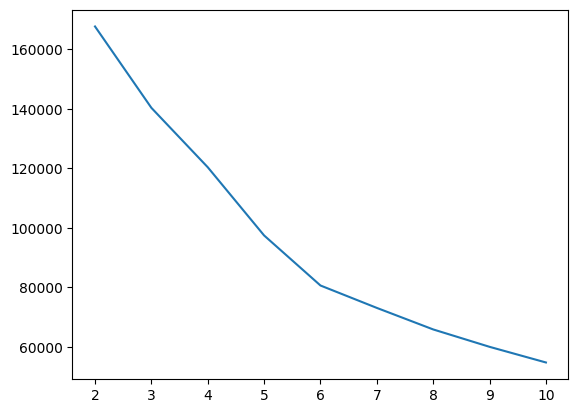

In [31]:
plt.plot(clusters, inertia)

#### From the elbow graph we can assume that 6 cluster is the best to choose

In [32]:
# with Power Transformer Transformation
clusters = []
inertia = []
for cluster in range(2,11):
    kmeans = KMeans(cluster)
    kmeans.fit(Final_Power_Transformer)
    clusters.append(cluster)
    inertia.append(kmeans.inertia_)
    sil_score = silhouette_score(Final_Power_Transformer, kmeans.labels_)
    print(f"for k : {cluster} silhouette_score :{sil_score}")

c:\Users\omarg\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


for k : 2 silhouette_score :0.4174351086390323


c:\Users\omarg\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


for k : 3 silhouette_score :0.48436672812302595


c:\Users\omarg\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


for k : 4 silhouette_score :0.5040223094876357


c:\Users\omarg\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


for k : 5 silhouette_score :0.4142621741237786


c:\Users\omarg\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


for k : 6 silhouette_score :0.41261963304511606


c:\Users\omarg\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


for k : 7 silhouette_score :0.41281426825857476


c:\Users\omarg\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


for k : 8 silhouette_score :0.388419582938276


c:\Users\omarg\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


for k : 9 silhouette_score :0.4015065273958117


c:\Users\omarg\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


for k : 10 silhouette_score :0.388509997852099


### Plot The ELbow Curve To take indication for the best Number of CLusters


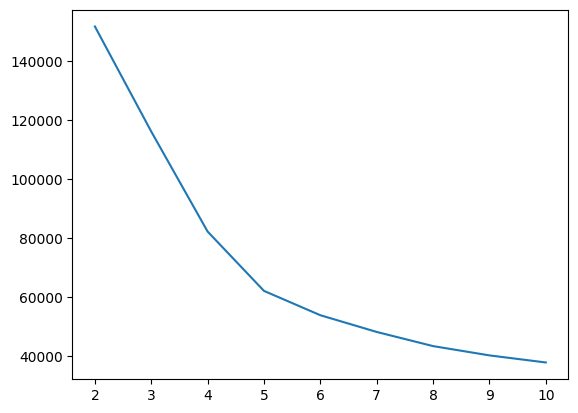

In [33]:
plt.plot(clusters, inertia)

#### from the above elbow curve we can go with 4 clusters 

# AGGLOMERATIVE MODELLING

In [34]:
# Using Power Transformer Transformation
for cluster in range(3,11):
    aggro = AgglomerativeClustering(cluster)
    aggro.fit(Final_Power_Transformer)
    clusters.append(cluster)
    sil_score = silhouette_score(Final_Power_Transformer, aggro.labels_)
    print(f"for k : {cluster} silhouette_score :{sil_score}")

for k : 3 silhouette_score :0.45861313570297163
for k : 4 silhouette_score :0.5035794010911004
for k : 5 silhouette_score :0.35854502140764344
for k : 6 silhouette_score :0.35713045865389204
for k : 7 silhouette_score :0.3552494452600964
for k : 8 silhouette_score :0.3642927332031552
for k : 9 silhouette_score :0.3727755756762371
for k : 10 silhouette_score :0.35391619015383396


In [ ]:
# Using Standered Scaler Transformation
for cluster in range(3,11):
    aggro = AgglomerativeClustering(cluster)
    aggro.fit(Final_Standered_Scaler)
    clusters.append(cluster)
    sil_score = silhouette_score(Final_Standered_Scaler, aggro.labels_)
    print(f"for k : {cluster} silhouette_score :{sil_score}")

# DBSCAN MODELLING 

In [48]:
# Modelling Using The Standered Scaler
dbscan=DBSCAN(eps=0.8,min_samples=200)
labels=dbscan.fit_predict(Final_Standered_Scaler)
sil=silhouette_score(Users_df,labels)
sil

-0.1287275361609135

In [47]:
# Modelling Using The Power Transformer
dbscan=DBSCAN(eps=1,min_samples=1000)
labels=dbscan.fit_predict(Final_Power_Transformer)
sil=silhouette_score(Users_df,labels)
sil

-0.07603477743879848

# At The end of the day 
### We Can Go With The KMEANS with Power Transformer Transformation with 4 cluster as we can see from the modelling it was the best 

In [49]:
kmeans = KMeans(4)
kmeans.fit_predict(Final_Power_Transformer)
kmeans.labels_

c:\Users\omarg\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([0, 0, 2, ..., 1, 1, 0])

In [50]:
silhouette_score(Final_Power_Transformer, kmeans.labels_)

0.5040167411940023

# Model Analysis

In [51]:
Users_df['Cluster_ID'] = kmeans.labels_

In [52]:
Users_df.head()

,User_Id,Total_Points,Last_Seen,Fashion,Grocery,F&B,Health & Beauty,Cluster_ID
0,0,4427,281,0,0,1,0,0
2,2,3000,236,0,0,1,0,0
3,3,1620,320,1,0,0,0,2
4,4,700,407,0,1,0,0,1
5,5,1536,23,0,1,0,0,1


<Axes: xlabel='Cluster_ID', ylabel='Last_Seen'>

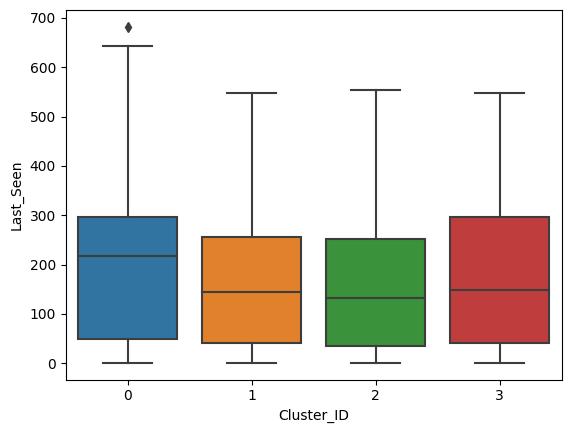

In [53]:
sns.boxplot(data = Users_df, x = 'Cluster_ID', y = 'Last_Seen')

<Axes: xlabel='Cluster_ID', ylabel='Total_Points'>

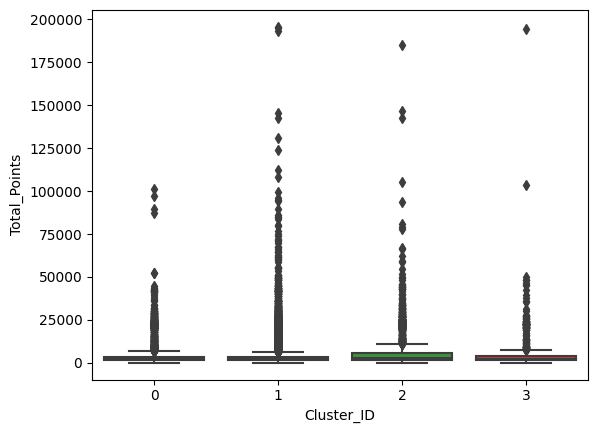

In [54]:
sns.boxplot(data = Users_df, x = 'Cluster_ID', y = 'Total_Points')

<Axes: xlabel='Cluster_ID', ylabel='Fashion'>

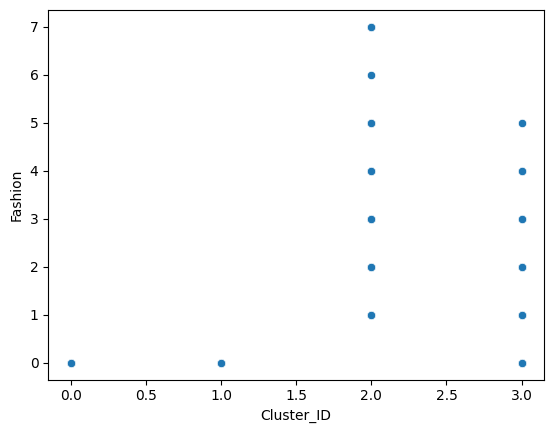

In [61]:
sns.scatterplot(data = Users_df, x = 'Cluster_ID', y = 'Fashion')

<Axes: xlabel='Cluster_ID', ylabel='Health & Beauty'>

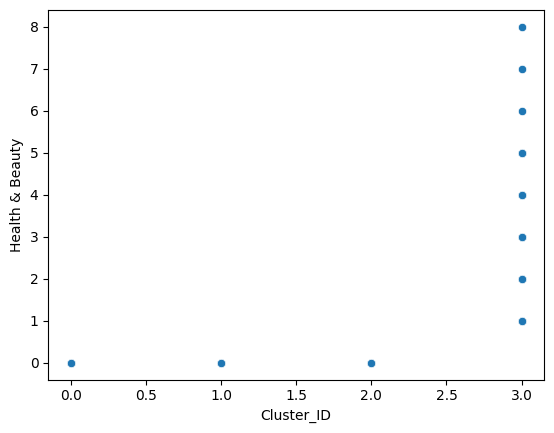

In [60]:
sns.scatterplot(data = Users_df, x = 'Cluster_ID', y = 'Health & Beauty')

<Axes: xlabel='Cluster_ID', ylabel='Grocery'>

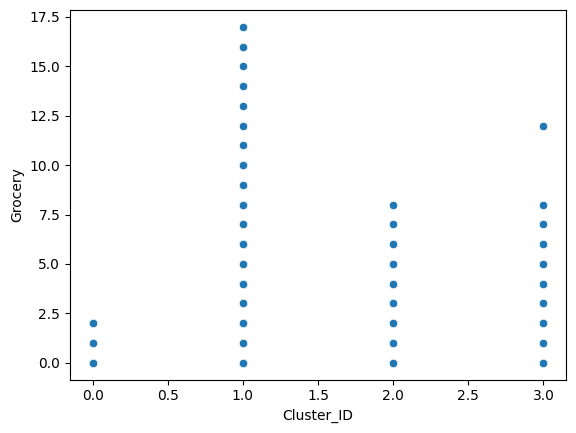

In [59]:
sns.scatterplot(data = Users_df, x = 'Cluster_ID', y = 'Grocery')

<Axes: xlabel='Cluster_ID', ylabel='F&B'>

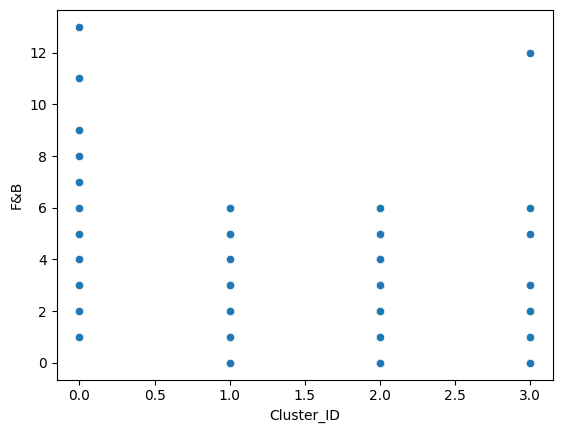

In [62]:
sns.scatterplot(data = Users_df, x = 'Cluster_ID', y = 'F&B')

### As we can figure Out That we have Clustered the Customers Almost by their category type and we also can notice that the most sales is on the Grocery Type "Cluster 1" which also has the most total points


### While the CLuster 2 customers are those customers that are interested in the Fashion and also have alot of points and appears alot on this website so we can like give them some sale or some thing 

### Cluster 3 are people that are interseted in The Beauty and Health Products and they do not appear on the website alot so we can remind them of their points and same for cluster zero in which the interest of the customers is in F&B products